<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/SolutionsAss6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 Solutions

1) a)

In [ ]:
library(ISLR)
attach(Carseats)
set.seed(1)

train = sample(dim(Carseats)[1], dim(Carseats)[1]/2) #split randomly
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 7):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 8):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects 

b)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "Income"     
[6] "CompPrice"  
Number of terminal nodes:  18 
Residual mean deviance:  2.36 = 429.5 / 182 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.2570 -1.0360  0.1024  0.0000  0.9301  3.9130 

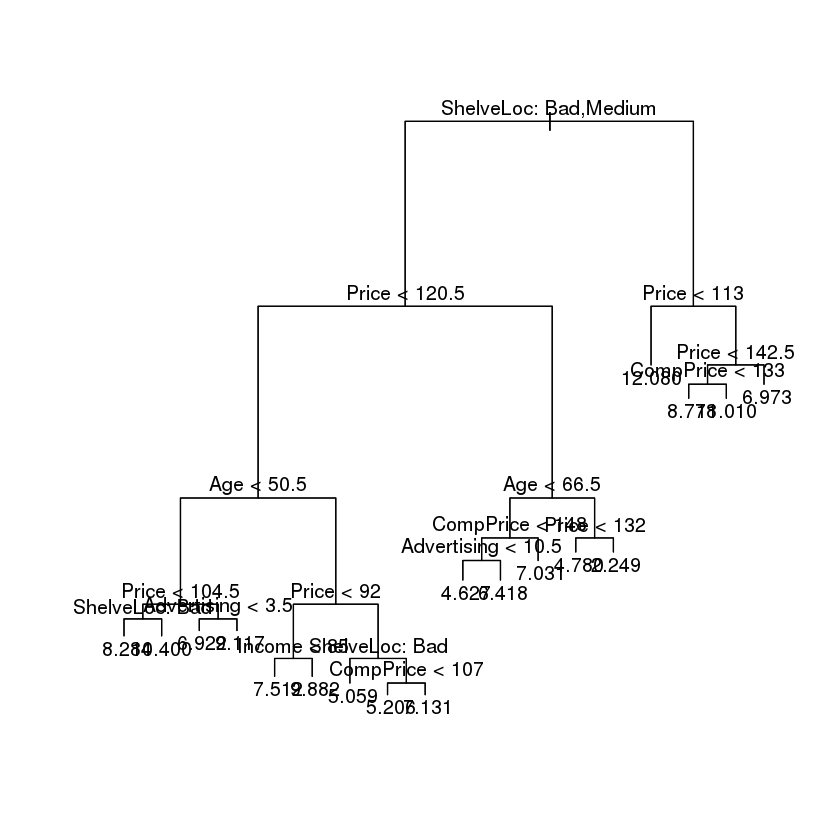

In [ ]:
library(tree)
tree.carseats = tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [ ]:
pred.carseats = predict(tree.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.carseats)^2)

[1] 4.148897

c)

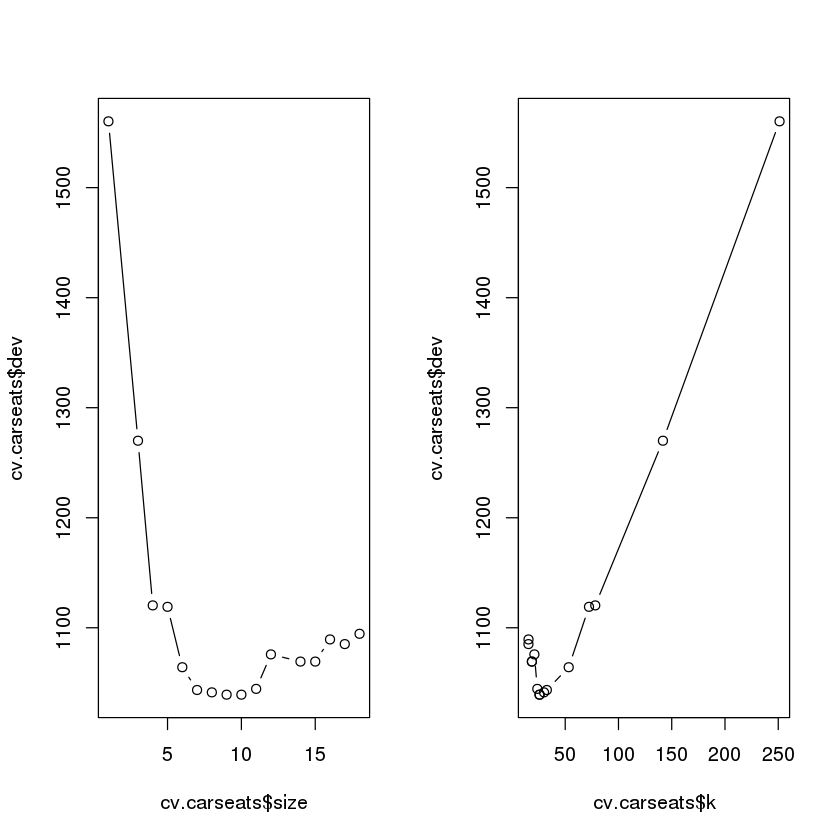

In [ ]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = "b")
plot(cv.carseats$k, cv.carseats$dev, type = "b")

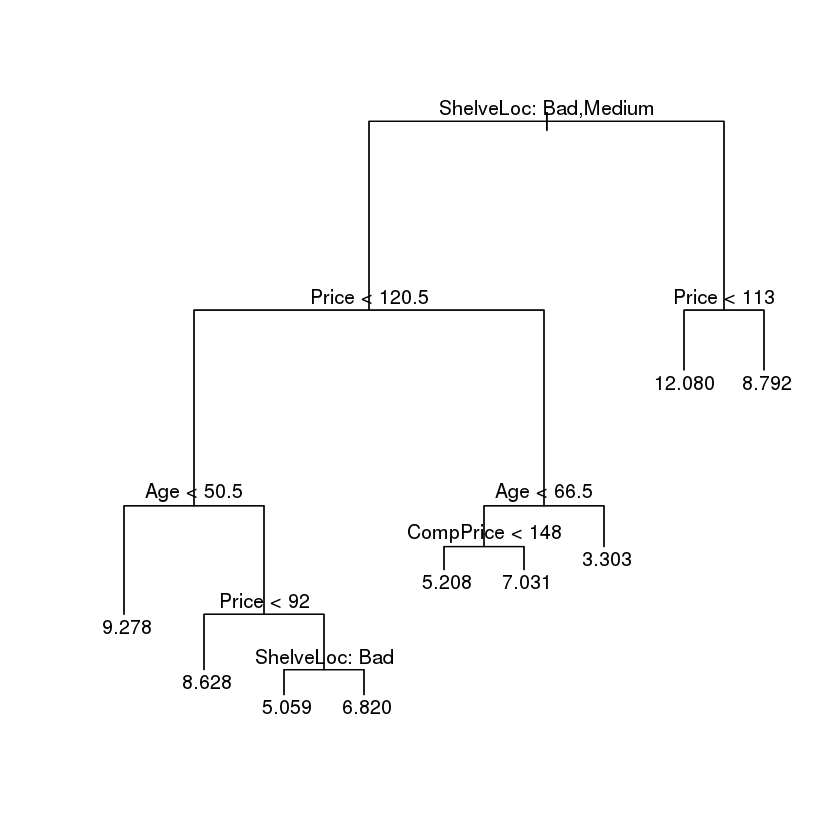

In [ ]:
# Best size = 9
pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

In [ ]:
pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

[1] 4.993124

In this case, pruning the tree has led to a larger MSE.

d)

In [ ]:
library(randomForest)
bag.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, 
    importance = T)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] 2.633915

Bagging leads to a MSE of 2.633

In [ ]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,16.9874366,126.852848
Income,3.8985402,78.314126
Advertising,16.5698586,123.702901
Population,0.6487058,62.328851
Price,55.3976775,514.654890
ShelveLoc,42.7849818,319.133777
Age,20.5135255,185.582077
Education,3.4615211,42.253410
Urban,-2.5125087,8.700009
US,7.3586645,18.180651


The most important predictors are Price, ShelveLocation and Age.

e)

In [ ]:
rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 7, ntree = 1000, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)

[1] 2.641737

MSE is roughly the same as Bagging. It goes up as fewer predictors are considered

importance(rf.carseats)

In [ ]:
The most important predictors are still Price, ShelveLocation and Age.

## Question 2
a)

In [ ]:
library(ISLR)
set.seed(9004)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

b)

In [ ]:
library(e1071)
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  432

 ( 217 215 )


Number of Classes:  2 

Levels: 
 CH MM




The classifier creates 432 support vectors out of 800 training points. Out of these, 217 belong to level 𝙲𝙷 and 215 belong to level 𝙼𝙼

c)

In [ ]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    train.pred
      CH  MM
  CH 439  53
  MM  82 226

    test.pred
      CH  MM
  CH 142  19
  MM  29  80

In [ ]:
(82 + 53)/(439 + 53 + 82 + 226)
(19 + 29)/(142 + 19 + 29 + 80)

[1] 0.16875

[1] 0.1777778

Training error rate is 16.9% and test error rate is 17.8%

d)

In [ ]:
set.seed(1)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.16875 0.02779513
2   0.01778279 0.17000 0.02713137
3   0.03162278 0.16625 0.02433134
4   0.05623413 0.16750 0.02648375
5   0.10000000 0.16750 0.02958040
6   0.17782794 0.16625 0.03230175
7   0.31622777 0.16875 0.03240906
8   0.56234133 0.16250 0.03173239
9   1.00000000 0.16250 0.03173239
10  1.77827941 0.16375 0.03087272
11  3.16227766 0.16875 0.03131937
12  5.62341325 0.17125 0.02766993
13 10.00000000 0.17125 0.02829041


Validation error is minimized with a cost around betwee 0.56234 and 1. We will choose 0.56234.

e)

In [ ]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    train.pred
      CH  MM
  CH 437  55
  MM  71 237

    test.pred
      CH  MM
  CH 141  20
  MM  29  80

In [ ]:
(55 + 71)/(437 + 55 + 71 + 237)
(29 + 20)/(141 + 20 + 29 + 80)

[1] 0.1575

[1] 0.1814815

The training error decreases to 16%, and the test error increases a bit to 18.1 by using cost 0.56243.

f)

In [ ]:
set.seed(410)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  367

 ( 184 183 )


Number of Classes:  2 

Levels: 
 CH MM




In [ ]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    train.pred
      CH  MM
  CH 452  40
  MM  78 230

    test.pred
      CH  MM
  CH 146  15
  MM  27  82

In [ ]:
(40 + 78)/(452 + 40 + 78 + 230)

(27 + 15)/(146 + 15 + 27 + 82)

[1] 0.1475

[1] 0.1555556

The radial kernel with default gamma creates 367 support vectors, out of which, 184 belong to level 𝙲𝙷 and 183 belong to level 𝙼𝙼. The training error rate is 14.75% and test error rate is now 15.5%, which is an improvement over the linear classifier.

In [ ]:
set.seed(1)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.17 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38500 0.04887626
2   0.01778279 0.38500 0.04887626
3   0.03162278 0.37375 0.06022239
4   0.05623413 0.21125 0.04226652
5   0.10000000 0.18125 0.02960973
6   0.17782794 0.18000 0.03545341
7   0.31622777 0.17750 0.02874698
8   0.56234133 0.17000 0.02513851
9   1.00000000 0.17000 0.02371708
10  1.77827941 0.17000 0.03129164
11  3.16227766 0.17500 0.03584302
12  5.62341325 0.17750 0.03476109
13 10.00000000 0.18000 0.04005205


In [ ]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    train.pred
      CH  MM
  CH 452  40
  MM  77 231

    test.pred
      CH  MM
  CH 146  15
  MM  28  81

In [ ]:
(77 + 40)/(452 + 40 + 77 + 231)
(28 + 15)/(146 + 15 + 28 + 81)

[1] 0.14625

[1] 0.1592593

Tuning slightly decreases training error to 14.6% and slightly increases test error to 16% which is still better than linear kernel.

f)

In [ ]:
set.seed(1)
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)

train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  452

 ( 232 220 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 460  32
  MM 105 203

    test.pred
      CH  MM
  CH 149  12
  MM  37  72

In [ ]:
(32 + 105)/(460 + 32 + 105 + 203)
(12 + 37)/(149 + 12 + 37 + 72)

[1] 0.17125

[1] 0.1814815

Training error for polynomial kernal with degree 2 is 17.1%. Test error is 18.1

In [ ]:
set.seed(1)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.18 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38500 0.04887626
2   0.01778279 0.36625 0.04411554
3   0.03162278 0.35875 0.03537988
4   0.05623413 0.34875 0.04803428
5   0.10000000 0.31750 0.04758034
6   0.17782794 0.25750 0.04937104
7   0.31622777 0.21000 0.03622844
8   0.56234133 0.20750 0.03593976
9   1.00000000 0.20000 0.02946278
10  1.77827941 0.19500 0.02898755
11  3.16227766 0.18000 0.03291403
12  5.62341325 0.18250 0.03073181
13 10.00000000 0.18625 0.03087272


In [ ]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    train.pred
      CH  MM
  CH 458  34
  MM  93 215

    test.pred
      CH  MM
  CH 147  14
  MM  32  77

In [ ]:
(34 + 93)/(458 + 34 + 93 + 215)
(14 + 32)/(147 + 14 + 32 + 77)

[1] 0.15875

[1] 0.1703704

Training error rate is 15.9% and test error rate is 17%

g) The radial kernal appears to perform better because it has the lowest test error rate of the three methods.